<a href="https://colab.research.google.com/github/Koel09/DS_LinearRegression_InsuranceForecast/blob/main/LinearRegression_InsuranceForecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,RobustScaler
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving PersonalMedicalInsurance.csv to PersonalMedicalInsurance.csv


In [3]:
df = pd.read_csv('PersonalMedicalInsurance.csv')
print(df.head())
# df = df.dropna()
# print(df.info())
print(df.isnull().sum())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
df['sex_cat'] = df['sex'].astype('category').cat.codes
df['smoker_cat'] = df['smoker'].astype('category').cat.codes
df['region_cat'] = df['region'].astype('category').cat.codes

# Select only numeric columns before correlation
numeric_df = df.select_dtypes(include=['number'])

numeric_df

,age,bmi,children,charges,sex_cat,smoker_cat,region_cat
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1
...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1
1334,18,31.920,0,2205.98080,0,0,0
1335,18,36.850,0,1629.83350,0,0,2
1336,21,25.800,0,2007.94500,0,0,3


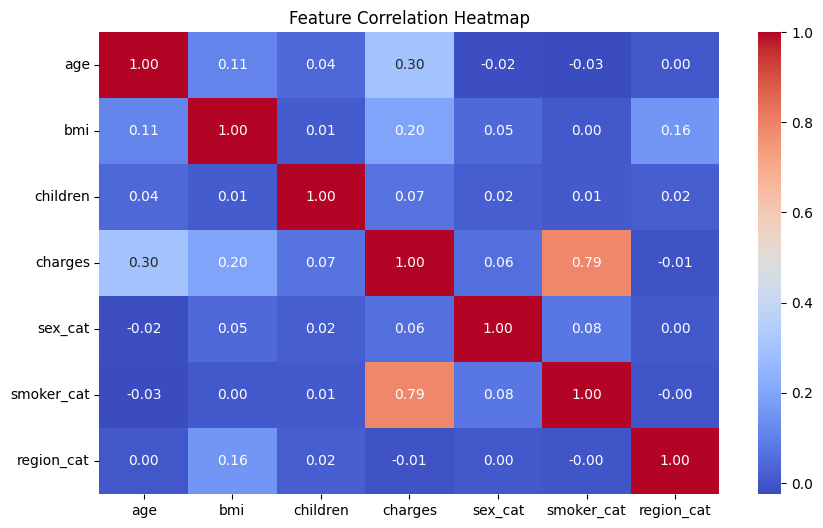

In [5]:

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [6]:
# Get unique values from each column
unique_region = df['region'].drop_duplicates().reset_index(drop=True)
unique_region_cat = df['region_cat'].drop_duplicates().reset_index(drop=True)

# Create a new DataFrame with both columns
unique_df = pd.DataFrame({
    'Unique_region': unique_region,
    'Unique_region_cat': unique_region_cat
})
unique_df

,Unique_region,Unique_region_cat
0,southwest,3
1,southeast,2
2,northwest,1
3,northeast,0


/usr/local/lib/python3.12/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x600 with 0 Axes>

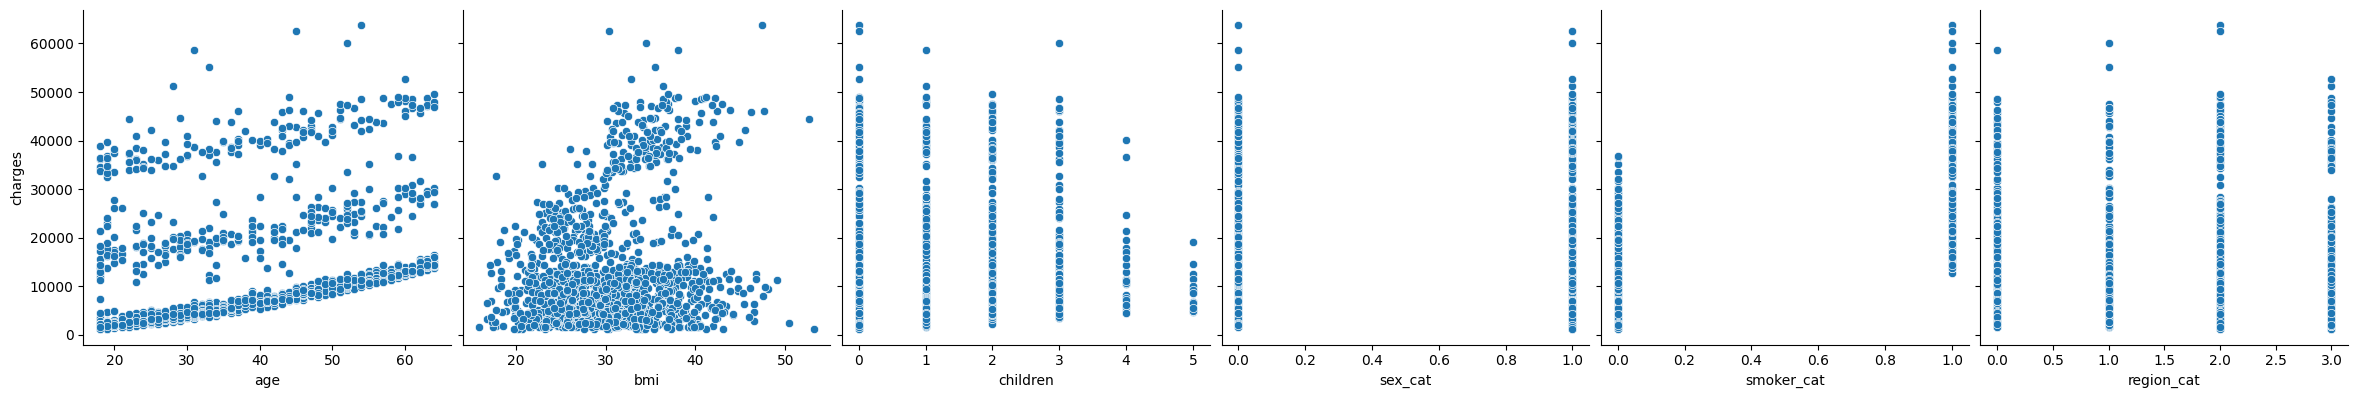

In [7]:
# pairplot to detect outliers
plt.figure(figsize=(10, 6))
#to plot all the scatterplots in a single plot
sns.pairplot(numeric_df, x_vars=[ 'age', 'bmi','children','sex_cat','smoker_cat','region_cat'], y_vars = 'charges', size = 4, kind = 'scatter' )
plt.show()

In [8]:
#features
X = numeric_df[['age','bmi','smoker_cat','children','sex_cat','region_cat']]
#target variable or label
y = numeric_df['charges']

# # performance
# scaler = RobustScaler()
# df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# df_scaled

Mean Squared Error: 36577777.09
R-squared Score: 0.72


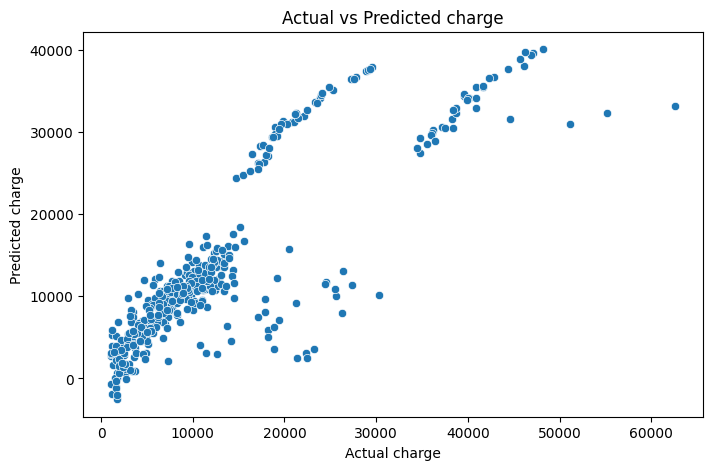

In [9]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}') # Lower the value the better
print(f'R-squared Score: {r2:.2f}') # Higher the value or closer the value to 1 the better

# Scatter plot: Actual vs Predicted charge
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual charge')
plt.ylabel('Predicted charge')
plt.title('Actual vs Predicted charge')
plt.show()

{'Simple Linear Regression': {'MSE': 36577777.09059157, 'R² Score': 0.7183245518407815}, 'Ridge Regression': {'MSE': 36503413.73232745, 'R² Score': 0.7188972037057046}, 'Lasso Regression': {'MSE': 36577330.54630195, 'R² Score': 0.7183279905561137}}
                                   MSE  R² Score
Simple Linear Regression  3.657778e+07  0.718325
Ridge Regression          3.650341e+07  0.718897
Lasso Regression          3.657733e+07  0.718328


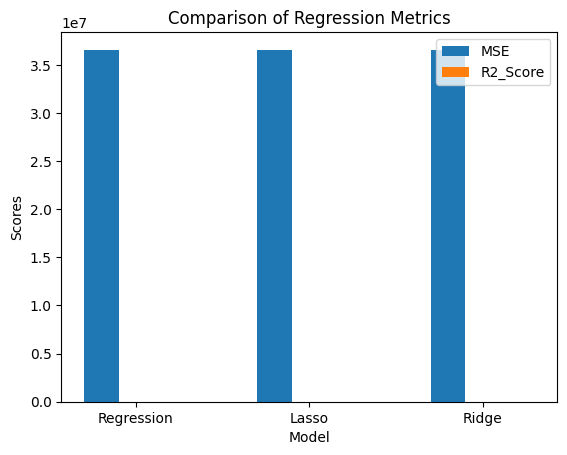

In [10]:
models = {
    "Simple Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0), # regularization coefficient
    "Lasso Regression": Lasso(alpha=0.1),
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R² Score": r2}

print(results)

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)

# plot comparison
mse = results_df['MSE']
r2_score = results_df['R² Score']

positions = np.arange(len(mse))
bar_width = 0.2

plt.bar(positions - bar_width, mse, width = bar_width, label = 'MSE')
plt.bar(positions + bar_width, r2_score, width = bar_width, label = 'R2_Score')

# adding labels and title
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Regression Metrics')

# adding the legend
plt.legend()
plt.xticks(positions, ['Regression', 'Lasso', 'Ridge'])
plt.show()